In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

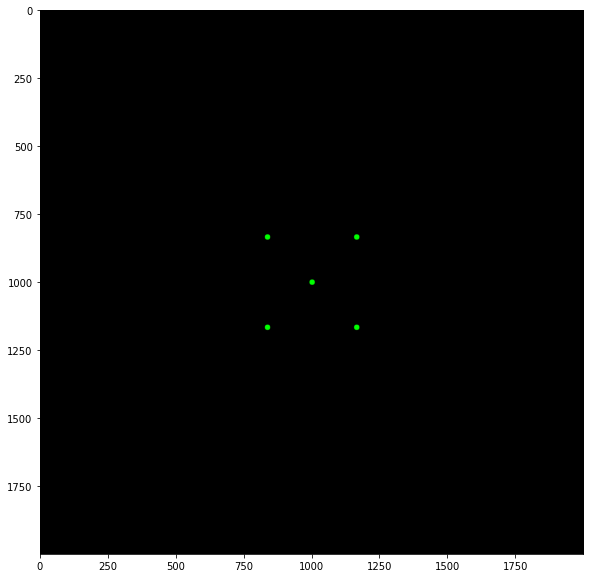

In [37]:
scale_y = 41         #1 meter in real world coordinates
scale_x = 41.5      #1 meter in real world coordinates 

#create an image
img_h = 2000
img_w = 2000
base_image = np.zeros((img_h,img_w,3),dtype=np.uint8)

#camera positions
#cam positions must be in same order used in xacro or urdf file
camera_positions = np.array([(4,4),(-4,4),(-4,-4),(4,-4),(0,0)]) #camera locations in xacro files(joints)
#I don't need the "spacing" parameter because my camera position is the actual distances

#the top of the camera faces the x direction in gazebo
#multiply by -1 and fliplr to align image and camera
cam_locations = -1*camera_positions*(scale_x,scale_y) + (img_w/2,img_h/2)
cam_locations = np.fliplr(cam_locations)

for px,py in cam_locations:
    px,py = int(px),int(py)
    cv2.circle(base_image,(px,py),10,(0,255,0),-1)


# x = int(cam_locations[2,0])
# y = int(cam_locations[2,1])
# cv2.circle(base_image,(x,y),10,(255,255,0),-1)
plt.figure(figsize=(10,10))
plt.imshow(base_image)   

In [ ]:
##### base_copy = base_image.copy()

base_copy1 = base_image.copy()
path = "segmented_imgs/camera1.png"
img = cv2.imread(path)
offset_x = int(cam_locations[0,0] - img.shape[1]/2)  #figure out the offset to get where the image is placed
offset_y = int(cam_locations[0,1] - img.shape[0]/2)
y1,y2 = offset_y,offset_y + img.shape[0]
x1,x2 = offset_x,offset_x + img.shape[1]
base_copy1[y1:y2,x1:x2] = img


# x = int(cam_locations[0,0])
# y = int(cam_locations[0,1])
# xx = int(cam_locations[1,0])
# yy = int(cam_locations[1,1])
# cv2.circle(base_copy,(xx,yy),4,(255,255,0),-1)
# cv2.circle(base_copy,(x,y),4,(255,255,0),-1)
plt.figure(figsize=(10,10))
# plt.imshow(base_copy1)


# ////////////////////////////////////////
base_copy2 = base_image.copy()
path = "segmented_imgs/camera2.png"
img = cv2.imread(path)
offset_x = int(cam_locations[1,0] - img.shape[1]/2)  #figure out the offset to get where the image is placed
offset_y = int(cam_locations[1,1] - img.shape[0]/2)
y1,y2 = offset_y,offset_y + img.shape[0]
x1,x2 = offset_x,offset_x + img.shape[1]
base_copy2[y1:y2,x1:x2] = img
plt.figure(figsize=(10,10))
# plt.imshow(base_copy2)

##///////////////////////////////////////
base_copy3 = base_image.copy()
path = "segmented_imgs/camera3.png"
img = cv2.imread(path)
offset_x = int(cam_locations[2,0] - img.shape[1]/2)  #figure out the offset to get where the image is placed
offset_y = int(cam_locations[2,1] - img.shape[0]/2)
y1,y2 = offset_y,offset_y + img.shape[0]
x1,x2 = offset_x,offset_x + img.shape[1]
base_copy3[y1:y2,x1:x2] = img
plt.figure(figsize=(10,10))
# plt.imshow(base_copy3)



##///////////////////////////////////////
base_copy4 = base_image.copy()
path = "segmented_imgs/camera4.png"
img = cv2.imread(path)
offset_x = int(cam_locations[3,0] - img.shape[1]/2)  #figure out the offset to get where the image is placed
offset_y = int(cam_locations[3,1] - img.shape[0]/2)
y1,y2 = offset_y,offset_y + img.shape[0]
x1,x2 = offset_x,offset_x + img.shape[1]
base_copy4[y1:y2,x1:x2] = img
plt.figure(figsize=(10,10))
# plt.imshow(base_copy4)



##///////////////////////////////////////
base_copy5 = base_image.copy()
path = "segmented_imgs/camera5.png"
img = cv2.imread(path)
#cam number - 1 = cam_location
offset_x = int(cam_locations[4,0] - img.shape[1]/2)  #figure out the offset to get where the image is placed
offset_y = int(cam_locations[4,1] - img.shape[0]/2)
y1,y2 = offset_y,offset_y + img.shape[0]
x1,x2 = offset_x,offset_x + img.shape[1]
base_copy5[y1:y2,x1:x2] = img
plt.figure(figsize=(10,10))
# plt.imshow(base_copy5)

add_img = base_copy1 + base_copy2+ base_copy3 + base_copy4 + base_copy5  ###add up images to get full mask

x1 = int(cam_locations[0,0] - img.shape[1]/2)  
y1 = int(cam_locations[0,1] - img.shape[0]/2)
x2 = int(cam_locations[2,0] + img.shape[1]/2)  
y2 = int(cam_locations[2,1] + img.shape[0]/2)

final_img = add_img[y1:y2,x1:x2]
plt.figure(figsize=(15,15))
plt.imshow(final_img)
print(final_img.shape)
# f_resize = cv2.resize(final_img,(200,200))
# cv2.imshow("image",f_resize)
# cv2.waitKey(0)
# cv2.destroyAllWindows

In [39]:
for num in cam_locations:
    print(num)

[836. 834.]
[ 836. 1166.]
[1164. 1166.]
[1164.  834.]
[1000. 1000.]
